In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
import os

from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image

from sklearn.model_selection import GridSearchCV

In [35]:
studentmerge = pd.read_csv("Data/student-merge-clean.csv")
studentmerge_num = studentmerge.select_dtypes(include = ['float64', 'int64'])

In [3]:
y = studentmerge_num["Walc"]
X = studentmerge_num.drop(["Dalc","Walc"],axis=1)

0.69377990430622


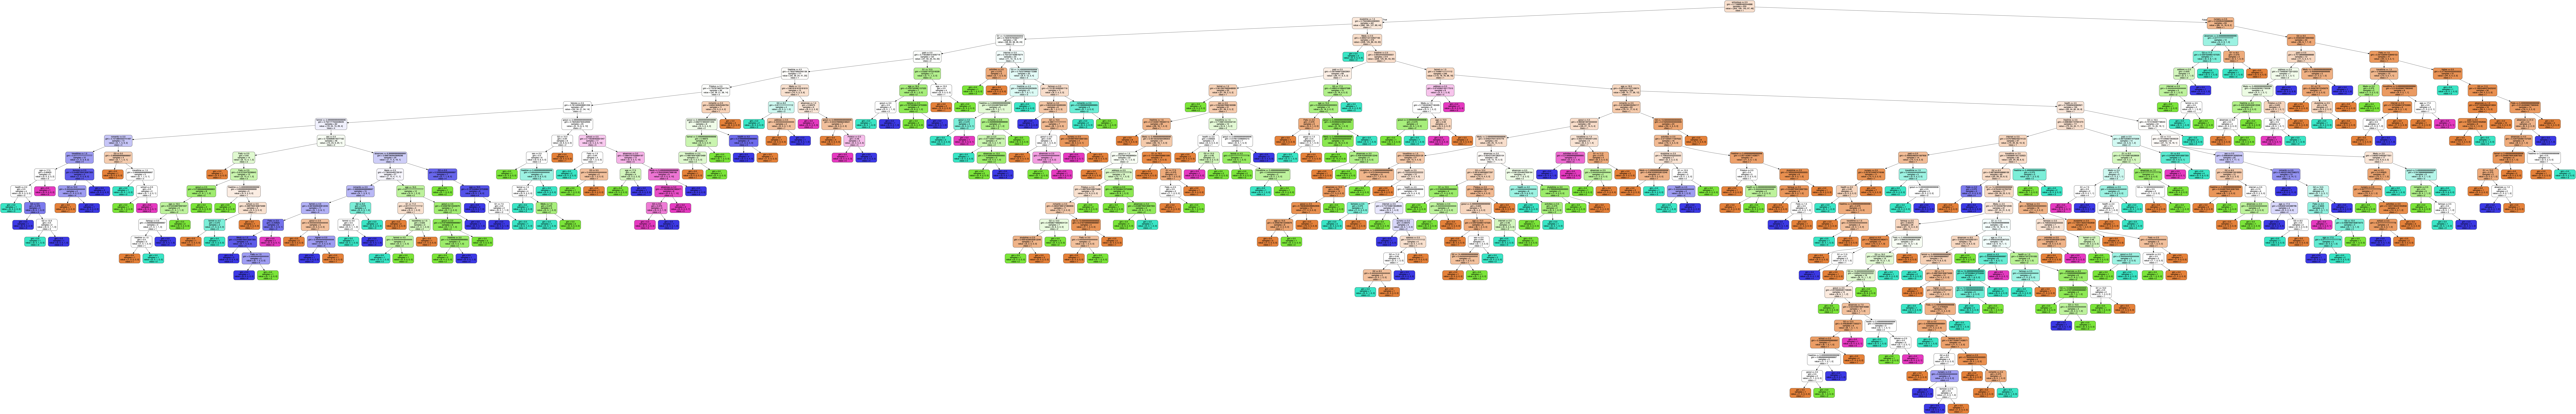

In [37]:
feature_names = [atts for atts in X]
class_names = ["1","2","3","4","5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(max_depth=25,n_estimators=50)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

# Export as dot file

estimator = clf.estimators_[49]

export_graphviz(estimator, out_file='tree.dot', 

                feature_names = feature_names,

                class_names = class_names,
                
                rounded = True, proportion = False, 

                precision = 200, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

Image(filename = 'tree.png')

In [38]:
correct = 0

for i in range(len(X_test)):
    a = clf.predict([X_test.iloc[i]])
    msg = ""
    if y_test.values[i] == a[0]:
        msg = "=====CORRECT====="
        correct += 1
    print("Actual={}  --  Predict={} -- {}".format(y_test.values[i],a, msg))
        #print("Actual={}  --  Predict={}".format(y_test.values[i],a))

print(correct/len(X_test))

Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=4  --  Predict=[1] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=5  --  Predict=[5] -- =====CORRECT=====
Actual=5  --  Predict=[5] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=2  --  Predict=[1] -- 
Actual=4  --  Predict=[2] -- 
Actual=2  --  Predict=[1] -- 
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=1  --  Predict=[2] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=2  --  Predict=[1] -- 
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=1  --  Predict

In [44]:
# Getting the optimal hyperparameters

grid_params = {
    'max_depth': list(range(1, 10)),
    'n_estimators': list(range(1, 10)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(range(2, 10))
}

gs_1 = GridSearchCV(RandomForestClassifier(), grid_params)
gs_1 = gs_1.fit(X, y)
print("Best hyperparameter: max_depth: {}\n".format(gs_1.best_params_.get('max_depth')))
print("Best hyperparameter: n_estimators: {}\n".format(gs_1.best_params_.get('n_estimators')))
print("Best hyperparameter: criterion: {}\n".format(gs_1.best_params_.get('criterion')))
print("Best hyperparameter: min_samples_split: {}\n".format(gs_1.best_params_.get('min_samples_split')))



/Users/lennartpikijn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best hyperparameter: max_depth: 9

Best hyperparameter: n_estimators: 9

Best hyperparameter: criterion: gini

Best hyperparameter: min_samples_split: 3



/Users/lennartpikijn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
